In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pymysql
pymysql.install_as_MySQLdb()

In [20]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [26]:
#Initial exploration of measurement data
data = engine.execute("SELECT * FROM Measurement LIMIT 10")
for record in data:
    print(record)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [27]:
#Initial exploration of station data
data = engine.execute("SELECT * FROM Station LIMIT 10")
for record in data:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [68]:
#import measurement data to a dataframe
conn = engine.connect()
measurement_df = pd.read_sql("SELECT * FROM Measurement ORDER BY date Desc", conn)
measurement_df.head()

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0


In [141]:
#import station data to a dataframe
conn = engine.connect()
station_df = pd.read_sql("SELECT * FROM Station", conn)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [131]:
#only gather past 12 months from dataset and reset index
measurement_p12m_df = measurement_df.loc[(measurement_df['date']>'2016-08-23')]
measurement_p12m_df = measurement_p12m_df.loc[:,['date','prcp']]

#sets the index to date
measurement_p12m_df.set_index('date')

#groups observations by date and sums total rainfall
measurement_p12m_grouped=measurement_p12m_df.groupby('date').sum().reset_index()
measurement_p12m_grouped.head()

,date,prcp
0,2016-08-24,9.33
1,2016-08-25,0.54
2,2016-08-26,0.10
3,2016-08-27,0.32
4,2016-08-28,3.10


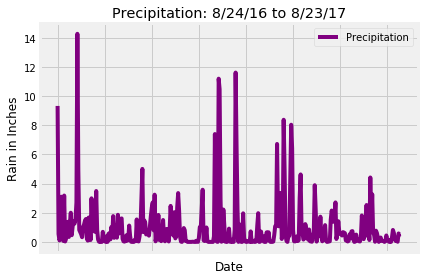

In [237]:
#create graph of temperatures in specific time period
measurement_p12m_grouped.plot('date', 'prcp', color='purple')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation: 8/24/16 to 8/23/17")
plt.legend(["Precipitation"])
plt.tight_layout()
plt.show()

In [133]:
#describe dataset
measurement_p12m_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Climate Analysis

In [240]:
# Number of unique stations in the dataset
grouped_stations_count=station_df.groupby('station').station.nunique().sum()
print ("There are", grouped_stations_count, "stations in the dataset")

There are 9 stations in the dataset


In [148]:
#Calculate station activity
active_stations = measurement_df.groupby('station').size().reset_index()
active_stations = active_stations.rename(columns={0: 'readings'}).sort_values('readings', ascending=False)
active_stations

,station,readings
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [250]:
#print most readings by a single station
max_reading = active_stations.iloc[0,:]
print("Station",max_reading.station, "recorded the most readings with", max_reading.readings)


Station USC00519281 recorded the most readings with 2772


In [252]:
#Identify recorded min, max, avg from most active station
most_active_station_data = measurement_df.loc[(measurement_df['station']=='USC00519281') & (measurement_df['date']>'2016-08-23')]
station_min = most_active_station_data['tobs'].min()
station_max = most_active_station_data['tobs'].max()
station_mean = most_active_station_data['tobs'].mean()
print ("Minimum recorded temperature:", station_min)
print ("Maximum recorded temperature:", station_max)
print ("Average recorded temperature:", station_mean)

Minimum recorded temperature: 59.0
Maximum recorded temperature: 83.0
Average recorded temperature: 73.0968660968661


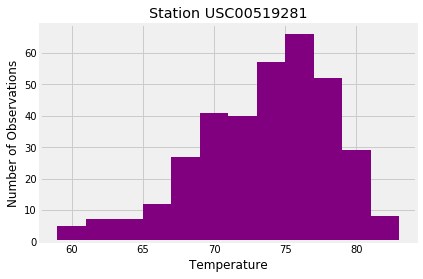

In [267]:
#histogram of recorded temperatures from most active station
plt.hist(most_active_station_data['tobs'],12, color='purple')
plt.xlabel("Temperature")
plt.ylabel("Number of Observations")
plt.title("Station USC00519281")
plt.show()

